<a href="https://colab.research.google.com/github/LuJam2021/Python_Learning_History/blob/main/20211015_%E8%82%A1%E7%A5%A8%E7%B8%BE%E6%95%88%E8%A8%88%E7%AE%97%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pyfolio

In [ ]:
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


## 抓FB的歷史股價

In [ ]:
import pandas_datareader.data as web

In [ ]:
import requests

In [ ]:
s = requests.session()
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}

In [ ]:
s.headers = headers

In [ ]:
df = web.DataReader('FB', 'yahoo', session=s)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-10-17,128.470001,127.320000,128.199997,127.540001,11351700,127.540001
2016-10-18,129.389999,128.009995,128.679993,128.570007,13504000,128.570007
2016-10-19,130.470001,128.600006,128.740005,130.110001,16752300,130.110001
2016-10-20,130.660004,129.500000,130.070007,130.000000,13167500,130.000000
2016-10-21,132.130005,129.699997,129.779999,132.070007,19088800,132.070007


In [ ]:
stock_rets = df['Close'].pct_change()

In [ ]:
df['ret'] = stock_rets

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,ret
Date,,,,,,,
2016-10-17,128.470001,127.320000,128.199997,127.540001,11351700,127.540001,NaN
2016-10-18,129.389999,128.009995,128.679993,128.570007,13504000,128.570007,0.008076
2016-10-19,130.470001,128.600006,128.740005,130.110001,16752300,130.110001,0.011978
2016-10-20,130.660004,129.500000,130.070007,130.000000,13167500,130.000000,-0.000845
2016-10-21,132.130005,129.699997,129.779999,132.070007,19088800,132.070007,0.015923


In [ ]:
# pyfolio這個套件裡面目前有一些錯誤
# 可以查詢他的 github 上面的 issues: https://github.com/quantopian/pyfolio/issues
# 所以我們改用 ffn 來計算 performance
pf.create_returns_tear_sheet(stock_rets)

Start date,2016-10-17
End date,2021-10-14
Total months,59
,Backtest
Annual return,20.9%
Cumulative returns,157.6%
Annual volatility,32.9%
Sharpe ratio,0.74
Calmar ratio,0.49
Stability,0.78
Max drawdown,-43.0%


AttributeError: ignored

## 使用 ffn 計算股票的績效表現

https://pmorissette.github.io/ffn/

In [ ]:
!pip install -q ffn

In [ ]:
import ffn

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
prices = pd.DataFrame()

In [ ]:
prices['AAPL'] = web.DataReader('AAPL', 'yahoo', start='2010-01-01', session=s)['Close']

In [ ]:
prices['MSFT'] = web.DataReader('MSFT', 'yahoo', start='2010-01-01', session=s)['Close']

In [ ]:
prices['GOOG'] = web.DataReader('GOOG', 'yahoo', start='2010-01-01', session=s)['Close']

In [ ]:
prices['TSLA'] = web.DataReader('TSLA', 'yahoo', start='2010-01-01', session=s)['Close']

In [ ]:
prices.head()

,AAPL,MSFT,GOOG,TSLA
Date,,,,
2010-01-04,7.643214,30.950001,312.204773,NaN
2010-01-05,7.656429,30.959999,310.829926,NaN
2010-01-06,7.534643,30.770000,302.994293,NaN
2010-01-07,7.520714,30.450001,295.940735,NaN
2010-01-08,7.570714,30.660000,299.885956,NaN


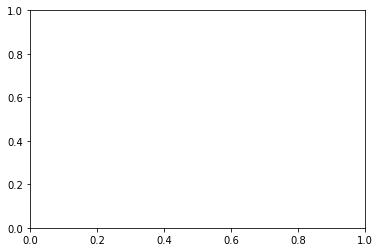

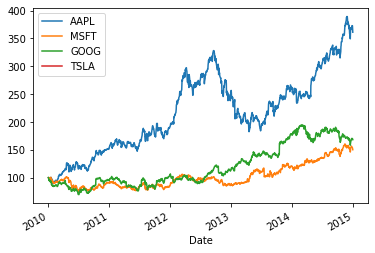

In [ ]:
fig, ax = plt.subplots()
ax = prices[:'2014'].rebase().plot()

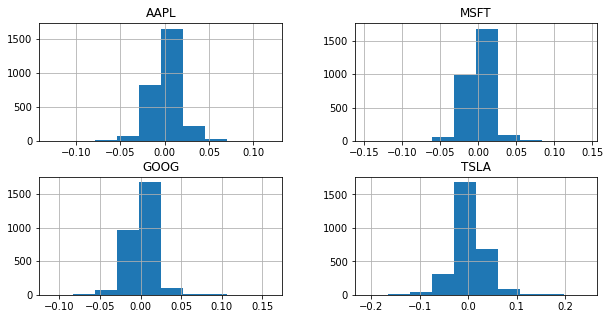

In [ ]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10, 5))

In [ ]:
stats = prices.calc_stats()
stats.display()

Stat                 AAPL        MSFT        GOOG        TSLA
-------------------  ----------  ----------  ----------  ----------
Start                2010-06-29  2010-06-29  2010-06-29  2010-06-29
End                  2021-10-14  2021-10-14  2021-10-14  2021-10-14
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         1471.33%    1198.80%    1149.87%    17026.83%
Daily Sharpe         1.01        1.03        1.00        1.09
Daily Sortino        1.68        1.73        1.69        1.92
CAGR                 27.62%      25.49%      25.06%      57.68%
Max Drawdown         -44.38%     -28.24%     -30.79%     -60.63%
Calmar Ratio         0.62        0.90        0.81        0.95

MTD                  1.60%       7.39%       6.11%       5.52%
3m                   -3.61%      7.16%       7.06%       25.24%
6m                   8.88%       18.45%      25.43%      11.76%
YTD                  8.34%       36.12%      61.44%      15.96%
1Y                   18.62%     

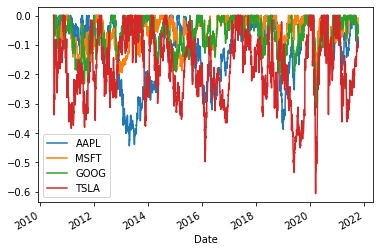

In [ ]:
# what about the drawdowns?
ax = stats.prices.to_drawdown_series().plot()

In [ ]:
returns.corr().as_format('.2f')

,AAPL,MSFT,GOOG,TSLA
AAPL,1.00,0.56,0.53,0.31
MSFT,0.56,1.00,0.62,0.32
GOOG,0.53,0.62,1.00,0.31
TSLA,0.31,0.32,0.31,1.00


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

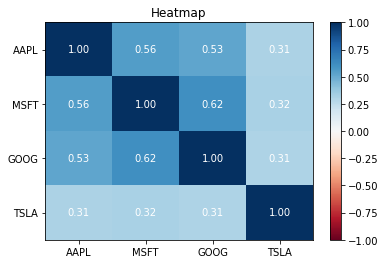

In [ ]:
returns.plot_corr_heatmap()